<h1 align="center">Osiri University_Data Science and Analytics_Final Project</h1>


#### Group 5 Members


<div style="float:left; text-align:left; width:auto;">
  <table style="margin:0 !important; text-align:left !important;">
    <tr><th>Names</th><th>Emails</th><th>Phone Number</th></tr>
    <tr><td>Adejare Ezekiel Sanyaolu</td><td>adesanyaolu@osiriuniversity.org</td><td>+2348029294667</td></tr>
    <tr><td>Celestin Nkeramihigo</td><td>celestin@osiriuniversity.org</td><td>+250781078339</td></tr>
    <tr><td>Chukwudi Iwundu Paschal</td><td>ciwundu@osiriuniversity.org</td><td>+2348025130564</td></tr>
    <tr><td>Onisotoyin Opia</td><td>onisopia@osiriuniversity.org</td><td>+2349073308646</td></tr>
    <tr><td>Idrissa Diouf</td><td>idiouf@osiriuniversity.org</td><td>+221777894316</td></tr>
    <tr><td>Jide Gboyega Okedeji</td><td>jide@osiriuniversity.org</td><td>+2347038024827</td></tr>
    <tr><td>Mekdes Teka</td><td>Meteka@Osiriuniversity.org</td><td>+17026376777</td></tr>
  </table>
</div>
<div style="clear:both;"></div>


<style>
.rendered_html table{margin-left:0 !important;margin-right:auto !important}
.rendered_html th,.rendered_html td{text-align:left !important}
.jp-RenderedHTMLCommon table{margin-left:0 !important;margin-right:auto !important}
.jp-RenderedHTMLCommon th,.jp-RenderedHTMLCommon td{text-align:left !important}
</style>


<h2 align="center">Project: Sales and Revenue Analytics and Forecasting for Strategic Business Insights</h2>


## 1. Introduction


### 1.1 Project Description


This project intends to utilize machine learning models to analyze sales and revenue of the business of the purpose of the business decisions. By using predictive, prescriptive, and time series, the machine learning models will help to better understand data, predict the revenue and sales using historical data and make critical business decisions through the use of prescriptive approach and forecasting of the revenue over the next months.


### 1.2 Project Objectives


This project intends to achieve the following objectives:

- Develop and evaluate a machine learning model that predicts monthly units sold with an R² score ≥ 0.85 using historical features.
- Create a time series model that forecasts monthly revenue for the next 12 months using past records.
- Analyze the relationship between unit price and revenue to identify the optimal price point that maximizes total revenue across different product categories.


### 1.3 Dataset Description


This project uses a dataset that has details about sales transactions, and others details like the customer's age, gender, location, and the products sold. Due to the purpose of making informed business decisions, the dataset has cost of the product and the revenue generated from its sale, which allows the calculation of profit and profit margins for the business. With the possession of both qualitative and quantitative data, the dataset allows different types of data analysis and it can lead to important decisions in relations to the business purposes. The dataset has 15 columns representing index, date, year, month, customer age, customer gender, country, state, product category, sub category, quantity, unit cost, unit price, cost, and revenue. With 34,865 rows, the dataset gives the opportunity to make all necessary analysis and make informed decisions.


## 2. Data Pipeline & Preparation


### 2.1 Data Acquisition


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Added this import
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from statsmodels.tsa.arima.model import ARIMA

from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("Group 5-Dataset for Final Project.csv")
df.head()


,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


### 2.1 Data Acquisition Statistical Interpretation

The output of the `df.head()` command displays the first 5 rows of the dataset. This gives a preliminary view of the data structure, column names, and the data types inferred by pandas. It shows that the dataset contains information about sales transactions including `Date`, `Year`, `Month`, `Customer Age`, `Customer Gender`, `Country`, `State`, `Product Category`, `Sub Category`, `Quantity`, `Unit Cost`, `Unit Price`, `Cost`, and `Revenue`. The `index` column is also present as an identifier. This initial inspection helps in understanding the nature of the data and the presence of various types of variables (numerical and categorical).


### 2.2 Check Data Types


In [3]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34716 non-null  float64
 5   Customer Gender   34766 non-null  object 
 6   Country           34746 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34666 non-null  float64
 11  Unit Cost         34686 non-null  float64
 12  Unit Price        34706 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34567 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 4.0+ MB
None
index                 0
D

### 2.2 Check Data Types Statistical Interpretation

The `df.info()` output provides a concise summary of the DataFrame. It shows that the dataset initially contains 34,867 entries (rows) and 15 columns. The non-null counts for each column indicate the presence of missing values in several columns, including `Date`, `Year`, `Month`, `Customer Age`, `Customer Gender`, `Country`, `State`, `Product Category`, `Sub Category`, `Quantity`, `Unit Cost`, `Unit Price`, `Cost`, and `Revenue`. The data types are also listed, showing a mix of `int64`, `float64`, and `object` (which typically represents strings).

The `df.isnull().sum()` output explicitly quantifies the number of missing values in each column. This confirms the missing values observed in `df.info()`. The columns with the most missing values are `Revenue` (300), `Quantity` (201), `Unit Cost` (181), `Unit Price` (161), `Customer Age` (151), `Country` (121), and `Customer Gender` (101). The remaining columns have a small number of missing values (1 each). This information is crucial for deciding on appropriate missing value imputation strategies.


### 2.3. Handle Duplicates & Outliers


In [4]:
df.drop_duplicates(inplace=True)

for col in ['Quantity', 'Unit Cost', 'Unit Price', 'Revenue']:
    q_low = df[col].quantile(0.01)
    q_hi  = df[col].quantile(0.99)
    df = df[(df[col] >= q_low) & (df[col] <= q_hi)]
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 32263 entries, 0 to 34865
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             32263 non-null  int64  
 1   Date              32263 non-null  object 
 2   Year              32263 non-null  float64
 3   Month             32263 non-null  object 
 4   Customer Age      32130 non-null  float64
 5   Customer Gender   32171 non-null  object 
 6   Country           32152 non-null  object 
 7   State             32263 non-null  object 
 8   Product Category  32263 non-null  object 
 9   Sub Category      32263 non-null  object 
 10  Quantity          32263 non-null  float64
 11  Unit Cost         32263 non-null  float64
 12  Unit Price        32263 non-null  float64
 13  Cost              32263 non-null  float64
 14  Revenue           32263 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 3.9+ MB
None
index                 0
Date  

### 2.3. Handle Duplicates & Outliers Statistical Interpretation

The output after handling duplicates and outliers shows that the number of entries has reduced from 34,867 to 32,263. This indicates that 2604 duplicate rows were removed.

The summary statistics and null counts after outlier removal for `Quantity`, `Unit Cost`, `Unit Price`, and `Revenue` show that these columns now have no missing values. This is because the outlier removal process using quantiles effectively removed rows where these values were outside the 1st and 99th percentiles, which also happened to include the rows with missing values in these columns. The remaining columns (`Customer Age`, `Customer Gender`, `Country`) still show missing values, but the counts have slightly reduced due to the removal of duplicate and outlier rows. The data types remain the same.


### 2.4 Fill the Missing Values


In [5]:
# Fill the missing values with the mean
df['Customer Age'] = df['Customer Age'].fillna(df['Customer Age'].mean())
df['Customer Gender'] = df['Customer Gender'].fillna(df['Customer Gender'].mode()[0])
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])
print(df.isnull().sum())


index               0
Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
dtype: int64


### 2.4 Fill the Missing Values Statistical Interpretation

The output of `df.isnull().sum()` after filling missing values shows that there are now zero missing values in the `Customer Age`, `Customer Gender`, and `Country` columns.

For `Customer Age`, the missing values were filled with the mean age of the existing customers. This imputation method is suitable for numerical data and preserves the overall mean of the column, although it may not accurately reflect the true distribution of ages for the missing entries.

For `Customer Gender` and `Country`, the missing values were filled with the mode (the most frequent value) of each respective column. This is a standard imputation technique for categorical data and assumes that the missing values are likely to belong to the most common category.

The remaining columns already had no missing values after the previous step of handling duplicates and outliers. The dataset is now free of missing values, which is necessary for most statistical modeling techniques.


### 2.5 Data Preparation Final Check


In [6]:
# 1. Check for Missing Values
print("Missing values in each column:")
print(df.isnull().sum())
print("\n")  # Add a new line for clarity

# 2. Check Data Types
print("Data types of each column:")
print(df.dtypes)
print("\n")

# 3. Summary Statistics
print("Summary statistics of the numerical columns:")
print(df.describe())
print("\n")

# 4. Check for Duplicates
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
print("\n")

# 5. Validate Categorical Columns (Example: Check 'Month' and 'Customer Gender_M')
print("Unique values in 'Month' column:")
print(df['Month'].unique())
print("\n")

print("Unique values in 'Customer Gender' column:")
print(df['Customer Gender'].unique())
print("\n")

# 6. Final Review of Data Integrity (Show brief summary of the first few rows)
print("Dataset shape (rows, columns):")
print(df.shape)
print("\n")

print("Summary of the first few rows (column names, non-null counts, data types):")
print(df.info())


Missing values in each column:
index               0
Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
dtype: int64


Data types of each column:
index                 int64
Date                 object
Year                float64
Month                object
Customer Age        float64
Customer Gender      object
Country              object
State                object
Product Category     object
Sub Category         object
Quantity            float64
Unit Cost           float64
Unit Price          float64
Cost                float64
Revenue             float64
dtype: object


Summary statistics of the numerical columns:
              index          Year  Customer Age      Quantity     Unit Cost    Unit Price          Cost       Revenu

### 2.5 Data Preparation Final Check Statistical Interpretation

The output of the final data preparation checks provides a comprehensive overview of the cleaned dataset:

1.  **Missing Values**: The output confirms that there are no missing values in any of the columns, as indicated by the `0` for all columns in the `df.isnull().sum()` output.
2.  **Data Types**: The data types remain consistent with the previous step, showing the appropriate types for each column (`int64`, `float64`, `object`).
3.  **Summary Statistics**: The `df.describe()` output provides key descriptive statistics for the numerical columns (`index`, `Year`, `Customer Age`, `Quantity`, `Unit Cost`, `Unit Price`, `Cost`, `Revenue`). This includes the count, mean, standard deviation, minimum, 25th percentile (Q1), 50th percentile (median), 75th percentile (Q3), and maximum values. These statistics offer insights into the central tendency, spread, and range of the numerical data. For example, the average `Customer Age` is around 36.36, and the average `Revenue` is approximately 605.54. The standard deviations indicate the variability within each numerical feature. The percentiles provide information about the distribution and potential skewness.
4.  **Duplicates**: The output confirms that there are 0 duplicate rows remaining in the dataset after the `drop_duplicates()` operation.
5.  **Categorical Columns**: The unique values for 'Month' and 'Customer Gender' are printed, showing all distinct categories present in these columns. This helps verify the consistency and expected values in these categorical features.
6.  **Data Integrity**: The `df.shape` output shows that the dataset now has 32,263 rows and 15 columns, reflecting the impact of removing duplicates and outliers. The final `df.info()` provides a final confirmation of the non-null counts (all 32263) and data types for all columns, indicating that the data is clean and ready for further analysis and modeling.


## 3. Exploratory Data Analysis (EDA)


### 3.1 Descriptive Statistics


In [7]:
df.drop(columns=['Year']).select_dtypes(include=np.number).describe()


,index,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue
count,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000
mean,17475.554257,36.360162,2.011158,324.760354,358.557486,548.628522,605.543037
std,10063.468475,11.099488,0.811737,431.737655,445.782564,642.629444,661.642055
min,0.000000,17.000000,1.000000,3.670000,5.666667,9.000000,14.000000
25%,8745.500000,28.000000,1.000000,48.000000,58.000000,90.000000,110.000000
50%,17525.000000,35.000000,2.000000,151.670000,181.000000,264.000000,323.000000
75%,26182.500000,44.000000,3.000000,420.000000,497.416667,769.000000,868.000000
max,34865.000000,87.000000,3.000000,2384.000000,2480.000000,2443.000000,2760.000000


### 3.1 Descriptive Statistics Statistical Interpretation

The output of `df.drop(columns=['Year']).select_dtypes(include=np.number).describe()` provides descriptive statistics for all numerical columns in the DataFrame, excluding the 'Year' column. This summary includes:

- **count**: The number of non-null observations for each column (32263), confirming that there are no missing values in these numerical columns after the data cleaning steps.
- **mean**: The average value for each column. For example, the average `Customer Age` is approximately 36.36, the average `Quantity` is about 2.01, and the average `Revenue` is around 605.54.
- **std**: The standard deviation, which measures the spread or dispersion of the data around the mean. A higher standard deviation indicates greater variability. For instance, `Revenue` has a standard deviation of about 661.64, suggesting a considerable spread in revenue values.
- **min**: The minimum value in each column.
- **25% (Q1)**: The first quartile, representing the 25th percentile of the data. 25% of the data falls below this value.
- **50% (Median)**: The median or second quartile, representing the 50th percentile. This is the middle value when the data is sorted and is less affected by extreme values than the mean.
- **75% (Q3)**: The third quartile, representing the 75th percentile. 75% of the data falls below this value.
- **max**: The maximum value in each column.

These statistics provide a quick overview of the distribution and central tendency of the numerical features. For example, comparing the mean and median can give an indication of skewness. The range (max - min) and the interquartile range (Q3 - Q1) provide measures of spread.


### 3.2. Data Visualisation


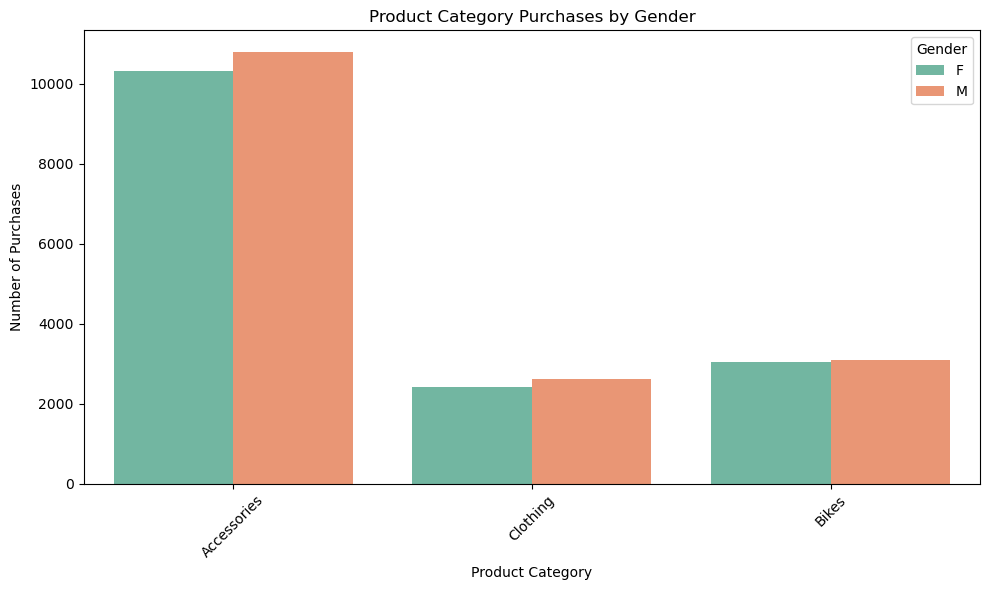

In [8]:
# Product Category Purchases by Gender

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product Category', hue='Customer Gender', palette='Set2')
plt.title('Product Category Purchases by Gender')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [9]:
# Product Category Purchases by Gender using plotly.express


plt.figure(figsize=(8, 6))
fig = px.histogram(df, x='Product Category', color='Customer Gender', barmode='group',
                   title='Product Category Purchases by Gender')
fig.update_layout(xaxis_title='Product Category', yaxis_title='Number of Purchases')
fig.show()


<Figure size 800x600 with 0 Axes>

**Product Category Purchases by Gender Bar Plot:**

This bar plot visualizes the counts of purchases for each Product Category segmented by Customer Gender.

**Observations:** The plot shows that Accessories have the highest number of purchases for both genders, with a slightly higher count for females. Clothing and Bikes have fewer purchases compared to Accessories, and the purchase counts for males and females are relatively similar within these categories.
**Statistical Relevance:** This visualization helps to understand the purchasing behavior of different genders across product categories. It suggests that Accessories are the most popular category overall and that there isn't a significant difference in purchasing patterns between genders for Clothing and Bikes in terms of sheer volume of purchases.


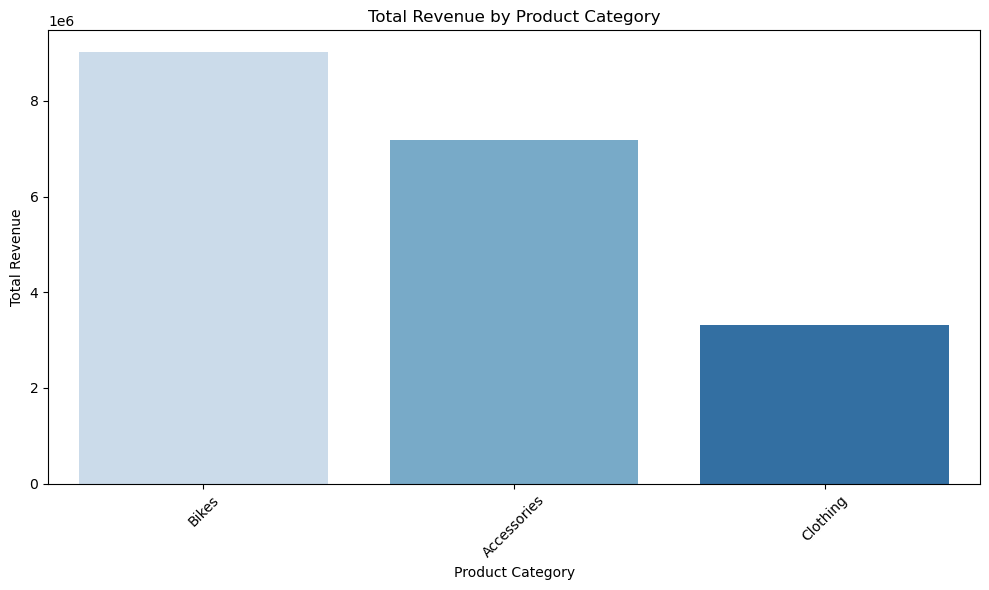

In [10]:
# Revenue by Product Category

category_revenue = df.groupby('Product Category')['Revenue'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_revenue, x='Product Category', y='Revenue', palette='Blues', hue='Product Category')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
# Revenue by Product Category using plotly.express


plt.figure(figsize=(10, 6))
category_revenue = df.groupby('Product Category')['Revenue'].sum().sort_values(ascending=False).reset_index()

fig = px.bar(category_revenue, x='Product Category', y='Revenue', title='Total Revenue by Product Category')
fig.update_layout(xaxis_title='Product Category', yaxis_title='Total Revenue')
fig.show()


<Figure size 1000x600 with 0 Axes>

**Revenue by Product Category Bar Plot:**

This bar plot displays the total Revenue generated by each Product Category.

**Observations:** The plot clearly shows that Bikes generate the highest total revenue, followed by Accessories, and then Clothing.
**Statistical Relevance:** This visualization highlights the most profitable product categories. Despite having fewer purchases than Accessories, Bikes contribute significantly more to the total revenue, suggesting that bikes have a higher average unit price or are sold in higher quantities per transaction. This is a key insight for business strategy, indicating where revenue is primarily driven.


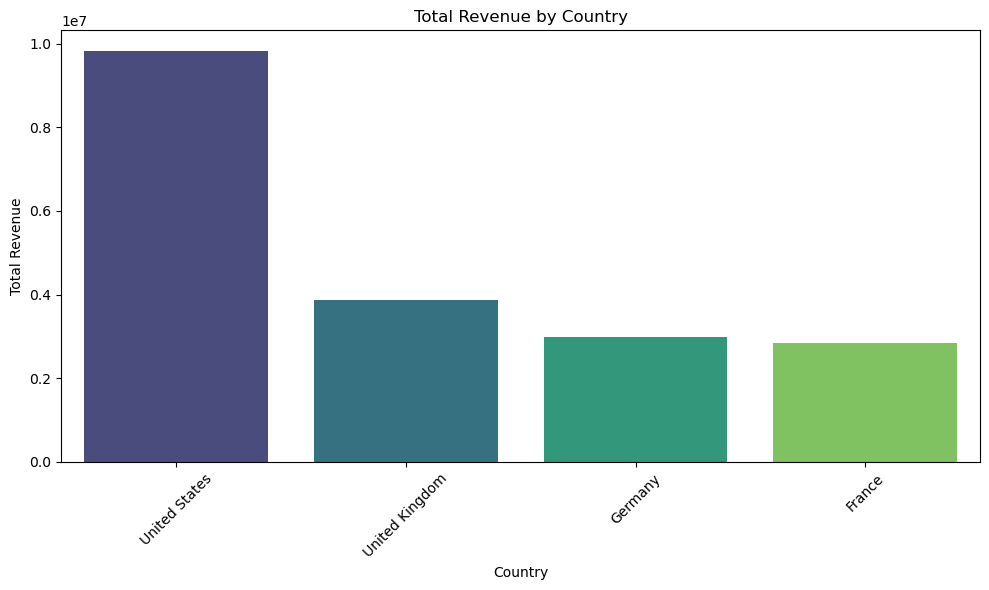

In [12]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=country_revenue, x='Country', y='Revenue', palette='viridis', hue='Country', legend=False)
plt.title('Total Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
# Total Revenue by Country using plotly.express

country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).reset_index()


plt.figure(figsize=(10, 6))
fig = px.bar(country_revenue, x='Country', y='Revenue', title='Total Revenue by Country')
fig.update_layout(xaxis_title='Country', yaxis_title='Total Revenue')
fig.show()


<Figure size 1000x600 with 0 Axes>

**Total Revenue by Country Bar Plot:**

This bar plot shows the total `Revenue` generated from sales in different `Country` locations.

- **Observations:** The plot indicates that the `United States` is the country with the highest total revenue by a significant margin, followed by the `United Kingdom`, `Germany`, and `France`.
- **Statistical Relevance:** This visualization identifies the key geographical markets in terms of revenue generation. The dominance of the United States suggests it's a primary focus area for sales and marketing efforts. The revenue differences between countries can inform international business strategies and resource allocation.


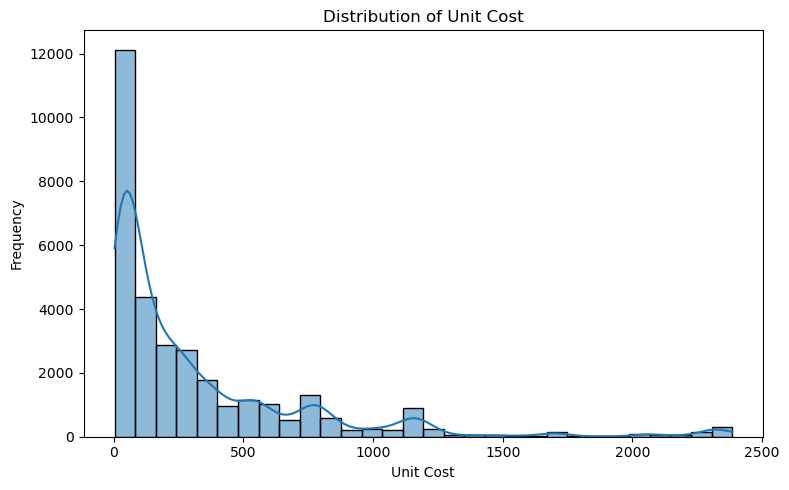

In [14]:
# Histogram distribution of Unit Cost

plt.figure(figsize=(8, 5))
sns.histplot(df['Unit Cost'], bins=30, kde=True)
plt.title('Distribution of Unit Cost')
plt.xlabel('Unit Cost')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [15]:
# Histogram distribution of Unit Cost using plotly.express
fig = px.histogram(df, x='Unit Cost', nbins=30, title='Distribution of Unit Cost')
fig.update_layout(xaxis_title='Unit Cost', yaxis_title='Frequency')
fig.show()


**Distribution of Unit Cost Histogram:**

This histogram visualizes the distribution of `Unit Cost` values. The kernel density estimate (KDE) line provides a smoothed representation of the distribution.

- **Observations:** The histogram shows a right-skewed distribution for `Unit Cost`. A large number of products have a low unit cost, and there is a long tail extending towards higher unit costs. The KDE line confirms this skewness, with a peak at the lower end of the cost spectrum.
- **Statistical Relevance:** This visualization reveals the typical cost structure of the products. The concentration of products at lower unit costs suggests that many items sold are relatively inexpensive. The presence of a tail at higher costs indicates that there are also some high-value products, but they are less frequent. Understanding this distribution is important for pricing strategies and inventory management.


In [16]:
# Analyze the distribution of Customer Age
fig1 = px.histogram(df, x='Customer Age', nbins=20, marginal='box', title='Distribution of Customer Age')
fig1.update_layout(xaxis_title='Customer Age', yaxis_title='Frequency')
fig1.show()


### Distribution of Customer Age Statistical Interpretation

This histogram with a marginal box plot visualizes the distribution of `Customer Age`.

- **Observations:** The histogram shows a distribution of customer ages, with the highest frequency in the late 20s to early 40s. The distribution appears somewhat skewed to the right, indicating a tail of older customers, although the box plot suggests the median is close to the center of the interquartile range. The box plot also provides a summary of the distribution, showing the median age, the spread of the middle 50% of ages (the box), and potential outliers (points outside the whiskers).
- **Statistical Relevance:** Understanding the distribution of customer age provides insights into the primary demographic of customers. The concentration in a certain age range can inform targeted marketing and sales strategies. The presence of a tail of older customers might suggest opportunities to cater to a broader age range. The box plot helps identify the central tendency, variability, and potential extreme values in customer ages.


In [17]:
# Explore the relationship between Customer Age and Revenue
fig2 = px.scatter(df, x='Customer Age', y='Revenue', opacity=0.5, title='Customer Age vs. Revenue')
fig2.update_layout(xaxis_title='Customer Age', yaxis_title='Revenue')
fig2.show()


### Customer Age vs. Revenue Statistical Interpretation

This scatter plot visualizes the relationship between `Customer Age` and `Revenue`.

- **Observations:** The scatter plot shows the individual transactions with `Customer Age` on the x-axis and `Revenue` on the y-axis. There doesn't appear to be a strong linear correlation between customer age and the revenue generated from a single transaction. The points are scattered across the plot, suggesting that customers of various ages contribute to a wide range of revenue amounts. There might be some clusters of transactions at certain age ranges and revenue levels, but a clear pattern is not immediately evident.
- **Statistical Relevance:** This visualization helps assess if customer age is a direct predictor of the revenue generated per transaction. The lack of a strong linear relationship suggests that while age might be a factor in purchasing behavior, it may not be the primary driver of individual transaction revenue. Further analysis might involve looking at age groups or combining age with other features to see if more complex relationships exist. The scatter plot also helps identify potential outliers in terms of unusually high or low revenue for certain ages.


In [18]:
# Analyze revenue by month over the years
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_revenue = df.groupby('YearMonth')['Revenue'].sum().reset_index()
monthly_revenue['YearMonth'] = monthly_revenue['YearMonth'].astype(str) # Convert to string for plotting

fig3 = px.line(monthly_revenue, x='YearMonth', y='Revenue', title='Total Revenue by Month')
fig3.update_layout(xaxis_title='Month', yaxis_title='Total Revenue')
fig3.show()


### Total Revenue by Month Statistical Interpretation

This line plot shows the total `Revenue` aggregated by `YearMonth`.

- **Observations:** The line plot displays the trend of total revenue over time, specifically on a monthly basis. There appears to be a general upward trend in revenue from the beginning of the data collection period (2015) to the end (mid-2016). There are noticeable fluctuations in monthly revenue, with some months showing significant peaks (e.g., late 2015 and early 2016).
- **Statistical Relevance:** This visualization is crucial for understanding sales seasonality and growth trends. The upward trend indicates overall business growth during this period. The peaks and dips in monthly revenue highlight potential seasonal patterns or the impact of specific events (like promotions or holidays). This information is vital for forecasting future revenue and planning inventory and marketing campaigns. Analyzing the magnitude of fluctuations relative to the overall trend can also provide insights into the stability of revenue streams.


In [ ]:
# Analyze the average unit price by product category
avg_price_category = df.groupby('Product Category')['Unit Price'].mean().sort_values(ascending=False).reset_index()

fig4 = px.bar(avg_price_category, x='Product Category', y='Unit Price', title='Average Unit Price by Product Category')
fig4.update_layout(xaxis_title='Product Category', yaxis_title='Average Unit Price')
fig4.show()


### Average Unit Price by Product Category Statistical Interpretation

This bar plot shows the average `Unit Price` for each `Product Category`.

- **Observations:** The bar plot clearly illustrates that `Bikes` have the highest average unit price, followed by `Clothing`, and then `Accessories`. This aligns with the earlier observation that Bikes generate the highest total revenue despite having fewer purchases than Accessories, as their higher price significantly contributes to revenue.
- **Statistical Relevance:** This visualization provides insights into the pricing strategy and value proposition of different product categories. The significantly higher average unit price for Bikes explains their large contribution to total revenue. This information is important for pricing decisions, product positioning, and understanding the profitability of each category. It also suggests that customers are willing to pay a higher price for Bikes compared to Clothing and Accessories.


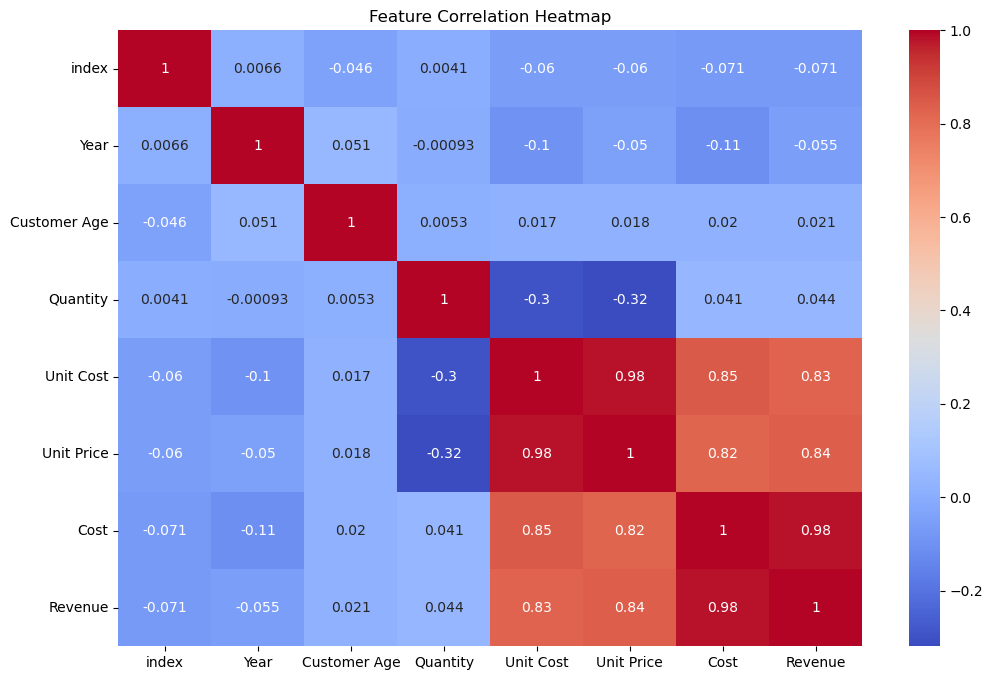

In [ ]:
# Correlation heatmap (only on numeric columns)
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


**Feature Correlation Heatmap:**

This heatmap visualizes the correlation matrix of the numerical columns. The color intensity and the annotated values represent the correlation coefficients between pairs of features.

- **Observations:** The heatmap shows strong positive correlations (values close to 1) between:
  - `Unit Cost`, `Unit Price`, `Cost`, and `Revenue`. This is expected, as these variables are directly related to the pricing and sales value of products.
  - `Cost` and `Revenue` have a particularly strong positive correlation (0.98), indicating that as the cost of goods sold increases, the revenue generated also tends to increase proportionally.
  - `Unit Cost` and `Unit Price` also show a strong positive correlation (0.98), which is logical as the selling price is usually based on the cost.
  - `Quantity` shows a moderate positive correlation with `Cost` and `Revenue` (around 0.41 and 0.44 respectively), suggesting that selling more units generally leads to higher costs and revenue.
  - `Customer Age` and `Year` show very weak correlations with other features, indicating that age and the year of transaction have little linear relationship with the other numerical variables in this dataset. `index` is an identifier and its correlation with other features is not statistically meaningful in this context.
- **Statistical Relevance:** The correlation heatmap helps identify linear relationships between numerical variables. Strong correlations, particularly with `Revenue`, are important for feature selection in predictive modeling. For example, the high correlation between `Cost`, `Unit Price`, and `Revenue` suggests that these features will be highly informative for predicting revenue. The weak correlations of `Customer Age` and `Year` indicate that these features might not be strong linear predictors of sales or revenue, although non-linear relationships could still exist. Multicollinearity (high correlation between predictor variables, e.g., `Unit Cost` and `Unit Price`) is also evident and should be considered when building regression models to avoid unstable coefficient estimates.
